In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
sns.set(font_scale=1.15)
sns.set_style("whitegrid")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
zf = zipfile.ZipFile("C://Users//chuen//Music//project//0.csv//credit_scoring_dataset.zip") 
data = pd.read_csv(zf.open('credit_scoring_dataset.csv'), index_col='customer_id')

df = data.copy()
print(df.shape)
df.head()

(32581, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
customer_id,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 3.0+ MB


## Univariate analysis

loan_status
Good    25472
Bad      7109
Name: count, dtype: int64
------------------------------------------------------------
loan_status
Good    78.180535
Bad     21.819465
Name: count, dtype: float64
------------------------------------------------------------


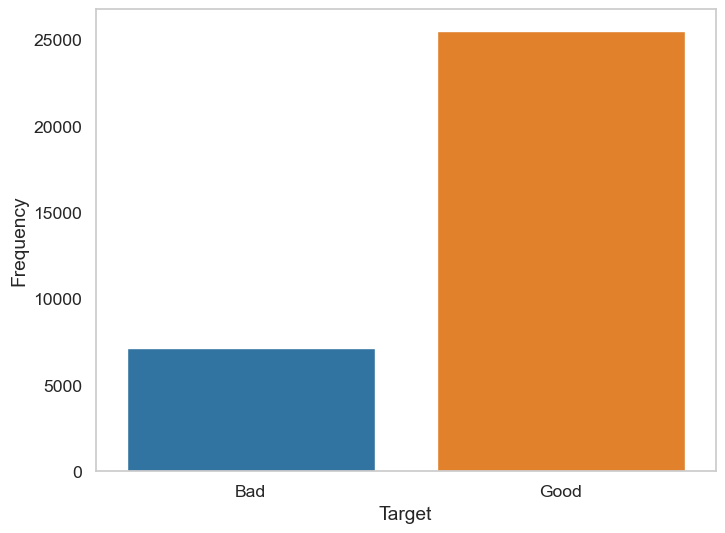


Imbalance Ratio (IR) = 1:3


In [5]:
#view taget 
df_target = df[['loan_status']]
df_target['loan_status'] = np.where(df_target['loan_status']==1,'Bad','Good')

print(df_target['loan_status'].value_counts())
print('-'*60)
print(df_target['loan_status'].value_counts()/len(df_target)*100)
print('-'*60)

fig = plt.figure(figsize=(8,6))
sns.countplot(x='loan_status',data=df_target, palette='tab10')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(False)
plt.show();

print()
count_good = len(df_target.loc[df_target['loan_status']=='Good'])
count_bad = len(df_target.loc[df_target['loan_status']=='Bad'])

print("Imbalance Ratio (IR) = 1:{}".format(int(count_good/count_bad)))

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218195,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413027,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,30.000000


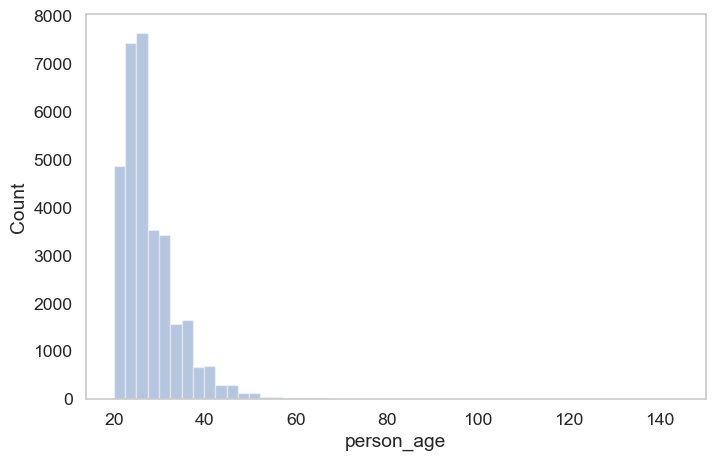

In [7]:
plt.subplots(figsize=(8,5))
sns.distplot(df['person_age'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show();

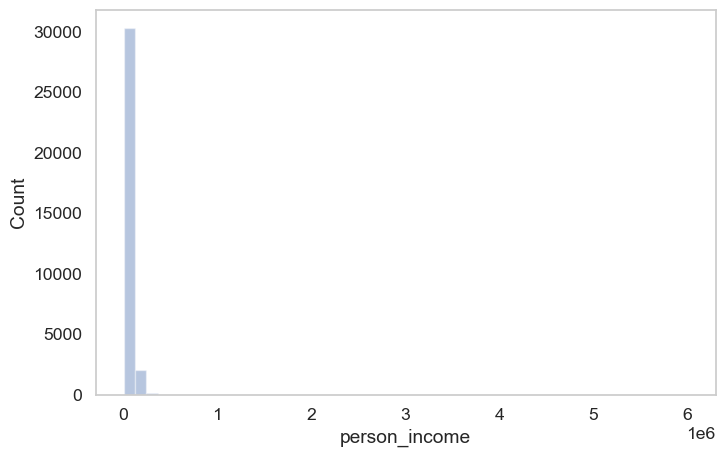

In [8]:
plt.subplots(figsize=(8,5))
sns.distplot(df['person_income'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

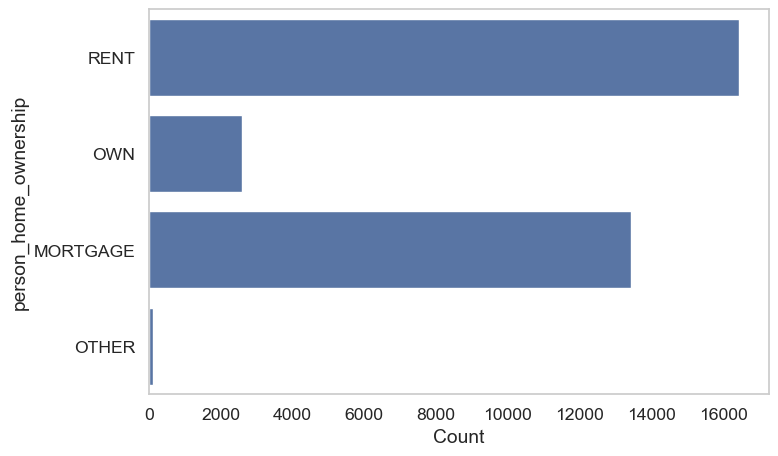

In [9]:
plt.subplots(figsize=(8,5))
sns.countplot(y="person_home_ownership", data=df)
plt.grid(False)
plt.xlabel('Count')
plt.show()

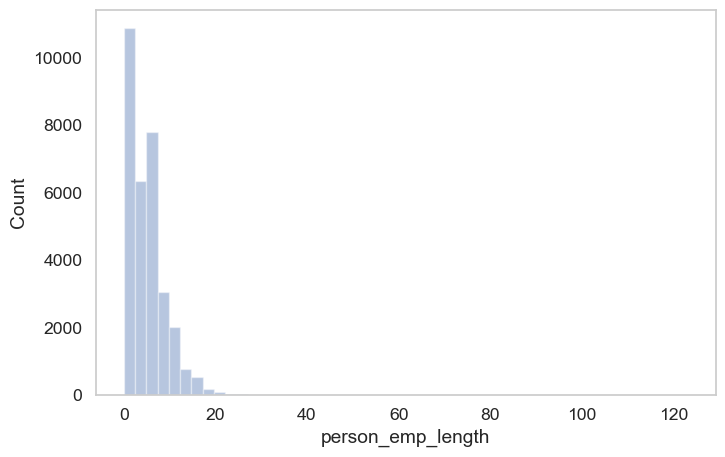

In [10]:
#เวลาในการทำงาน
plt.subplots(figsize=(8,5))
sns.distplot(df['person_emp_length'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

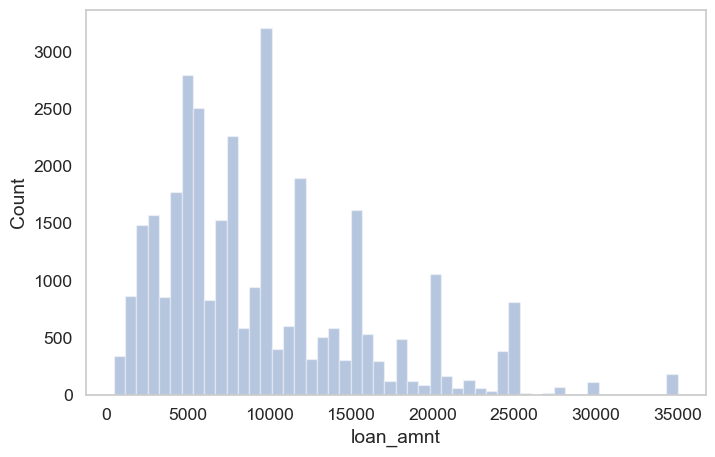

In [11]:
#จำนวนที่ไปกู้มา
plt.subplots(figsize=(8,5))
sns.distplot(df['loan_amnt'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

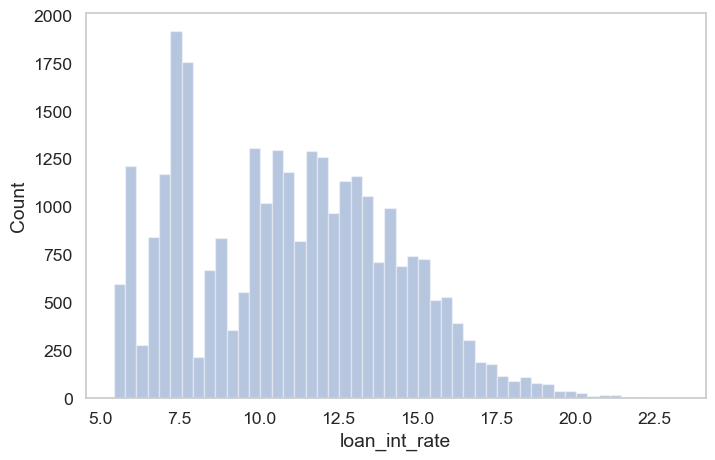

In [12]:
#ไปกู้มามีดอกเบี้ยเท่าไหร
plt.subplots(figsize=(8,5))
sns.distplot(df['loan_int_rate'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

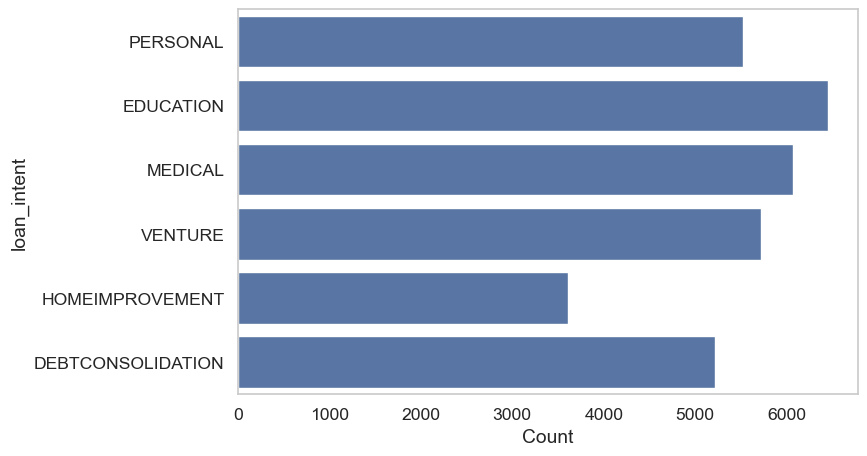

In [13]:
plt.subplots(figsize=(8,5))
sns.countplot(y="loan_intent", data=df)
plt.grid(False)
plt.xlabel('Count')
plt.show()

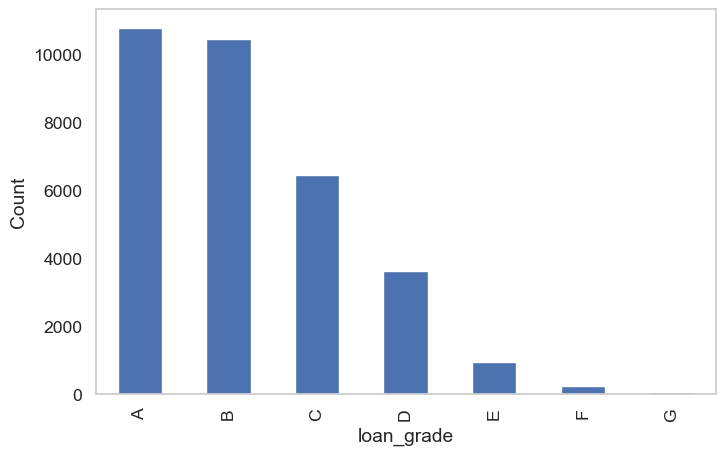

In [14]:
#บูโรgrade
plt.subplots(figsize=(8,5))
df['loan_grade'].value_counts().plot(kind="bar")
plt.grid(False)
plt.ylabel('Count')
plt.show()

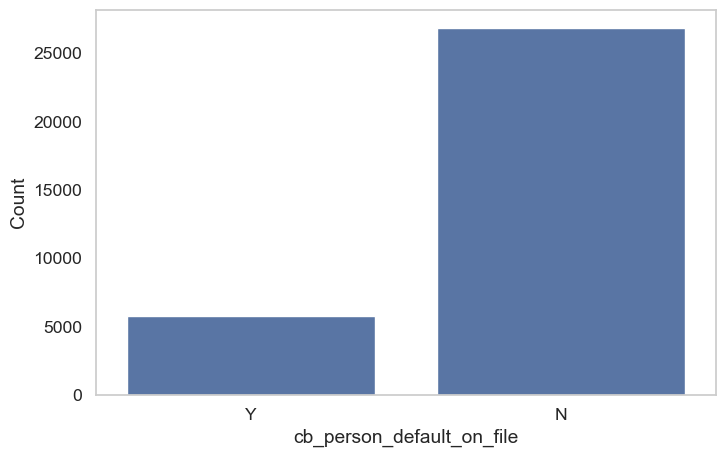

In [15]:
#เคยมีประวัติเสียบนบูโรไหม
plt.subplots(figsize=(8,5))
sns.countplot(x="cb_person_default_on_file", data=df)
plt.grid(False)
plt.ylabel('Count')
plt.show()

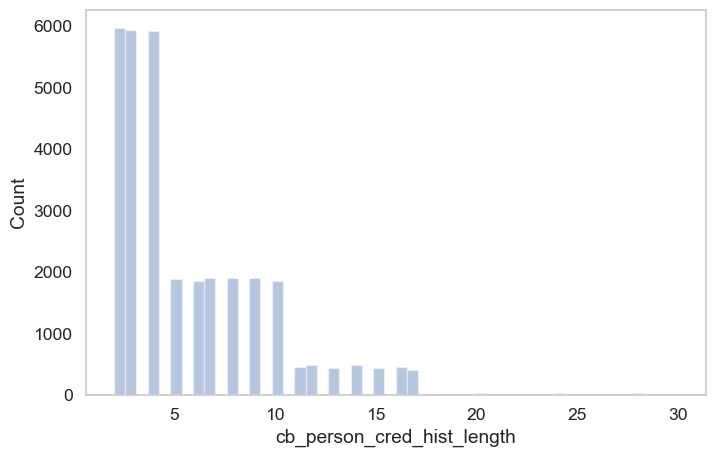

In [16]:
#อยู่กับบูโรมานานแค่ไหนแล้ว
plt.subplots(figsize=(8,5))
sns.distplot(df['cb_person_cred_hist_length'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

## Bivariate analysis

In [17]:
#วัตถุประสงค์ของการกู้
df.groupby('loan_intent').agg({'loan_amnt': 'mean', 
                               'loan_int_rate': 'mean'}).sort_values(by='loan_amnt', ascending=False)

,loan_amnt,loan_int_rate
loan_intent,,
HOMEIMPROVEMENT,10360.520111,11.201152
DEBTCONSOLIDATION,9594.886800,10.983268
VENTURE,9583.777758,10.948275
PERSONAL,9573.772867,10.998221
EDUCATION,9482.678599,10.950261
MEDICAL,9259.582441,11.060194


## EDA

In [18]:
df_age = df[['loan_status', 'person_age']]
df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0) 
df_age = df_age.groupby('bin_person_age').agg({'loan_status': ['count', 'sum']}) 
df_age.columns = df_age.columns.map('_'.join) 
df_age['dist'] = df_age['loan_status_count']/df_age['loan_status_count'].sum() 
df_age['bad_rate'] = df_age['loan_status_sum']/df_age['loan_status_count'] 
df_age = df_age.reset_index()
df_age

,bin_person_age,loan_status_count,loan_status_sum,dist,bad_rate
0,"(19.0, 23.0]",8766,2092,0.269053,0.238649
1,"(23.0, 25.0]",6586,1444,0.202142,0.219253
2,"(25.0, 27.0]",4615,961,0.141647,0.208234
3,"(27.0, 32.0]",6963,1445,0.213714,0.207525
4,"(32.0, 144.0]",5651,1167,0.173445,0.206512


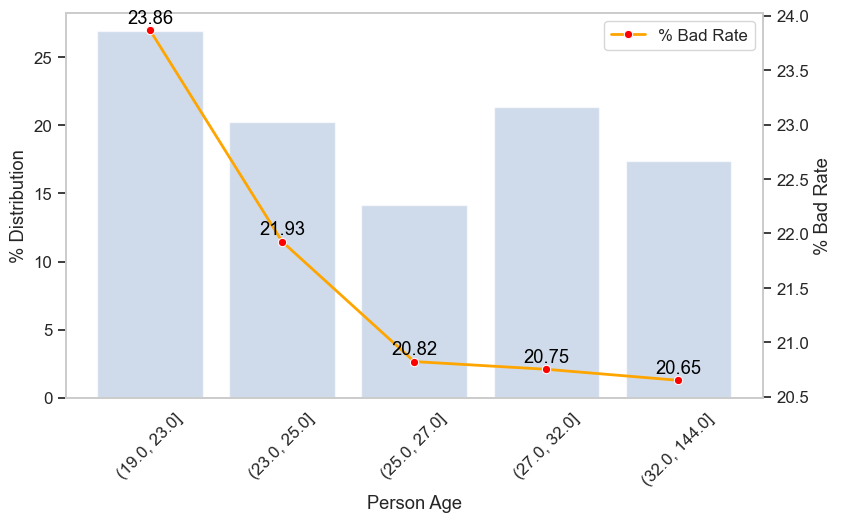

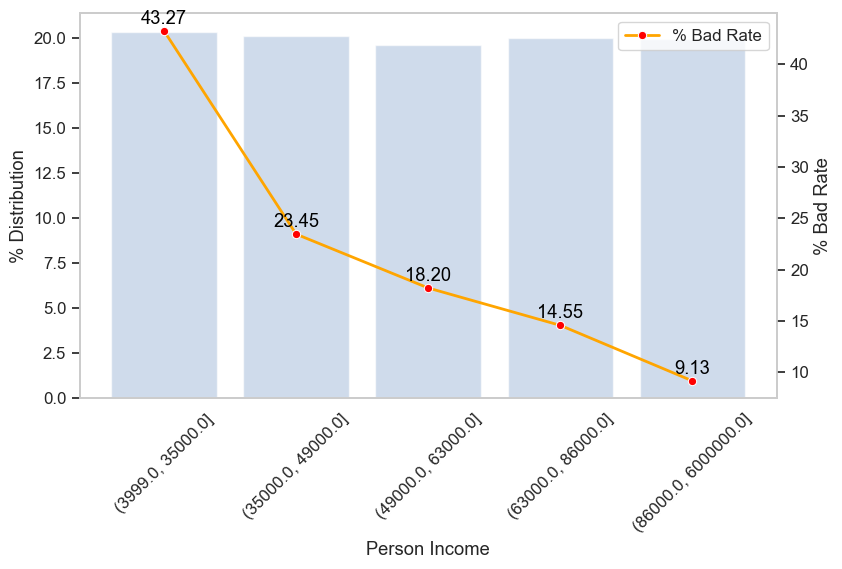

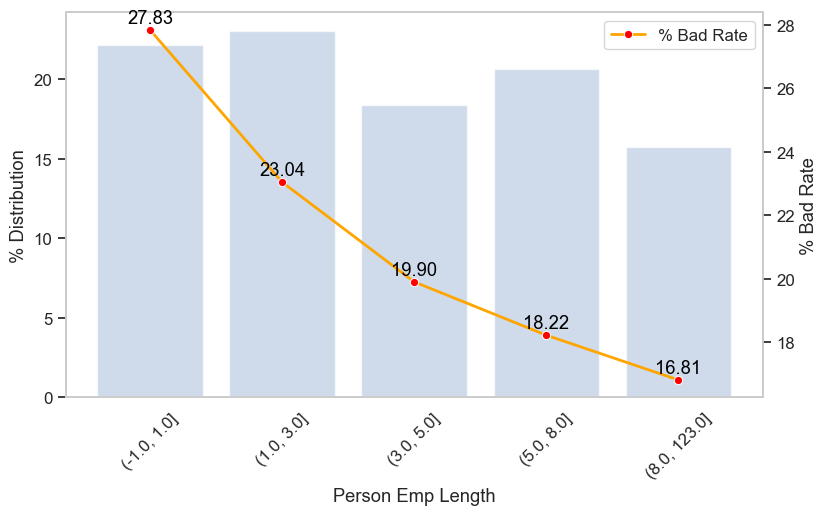

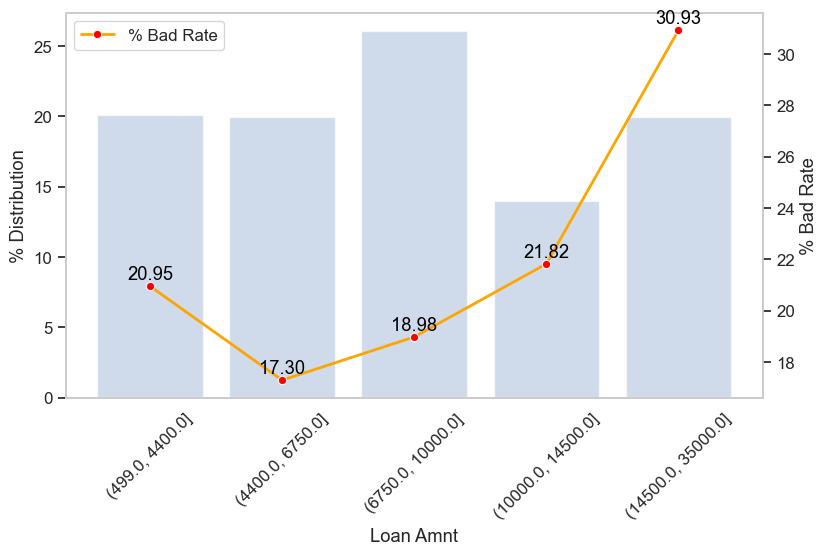

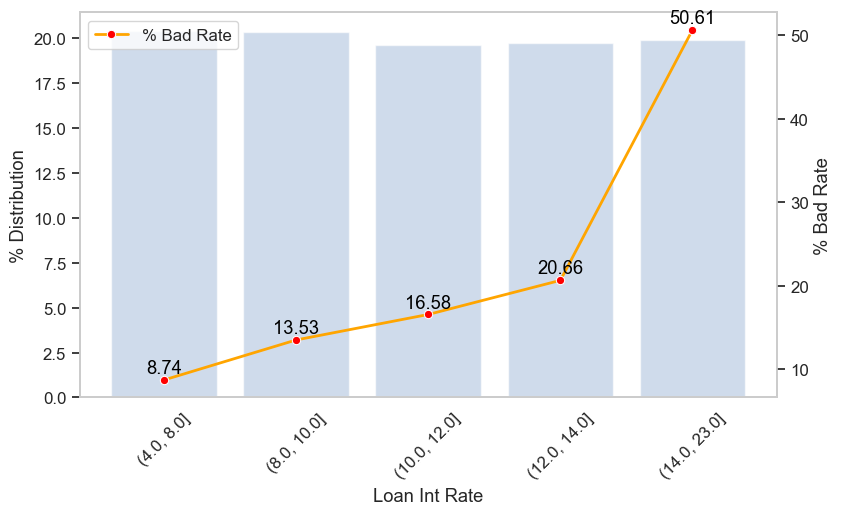

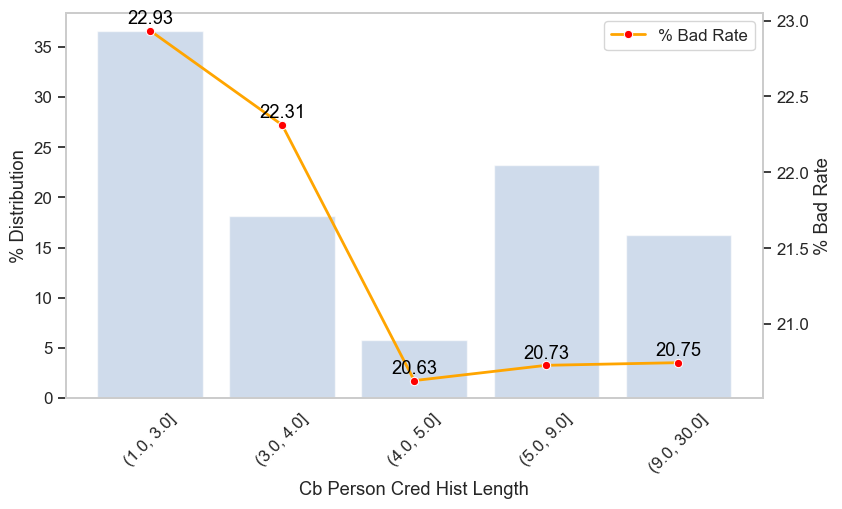

In [19]:
df_plot = df.copy()

for i in df_plot._get_numeric_data().columns: 
  if i == 'loan_status': 
    pass
  else:

    

    df_group = df_plot[['loan_status', i]]
    df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
    df_group = df_group.groupby('bin_'+i).agg({'loan_status': ['count', 'sum']})
    df_group.columns = df_group.columns.map('_'.join)
    df_group['dist'] = df_group['loan_status_count']/df_group['loan_status_count'].sum()
    df_group['bad_rate'] = df_group['loan_status_sum']/df_group['loan_status_count']
    df_group = df_group.reset_index()
 
    x1 = df_group['bin_'+i].astype(str)
    x2 = df_group.index
    y1 = df_group['dist']*100   
    y2 = df_group['bad_rate']*100   

    sns.set(font_scale=1.1)
    sns.set_style("whitegrid")
    fig, ax1  = plt.subplots(figsize=(9,5))
    plt.tick_params(axis='x', rotation = 45)

    ### y axis (left) is bar plot ###

    ax1.bar(x1,y1, data = df_group, color='lightsteelblue', alpha=.6)

    ### y axis (right) is line chart ###
    ax2 = ax1.twinx()

    ax2 = sns.lineplot(x=x2, y=y2, marker='o',
                   markerfacecolor='red', markersize=6, color='orange', 
                   linewidth=2, label='% Bad Rate')


      
    ax1.set_xlabel(i.replace("_"," ").title())
    ax1.set_ylabel('% Distribution')
    ax2.set_ylabel('% Bad Rate')
    ax1.grid(False)
    ax2.grid(False)

    for x,y in zip(x2,y2):
            label = "{:.2f}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

    
    plt.show();


In [20]:
def mean_target_per_category(df, var): 
     
    temp_df = pd.Series(df[var].value_counts() / len(df)).reset_index()
    temp_df.columns = [var, '%Dist'] 

    temp_df = temp_df.merge(df.groupby([var])['loan_status'].mean().reset_index(), 
                            on=var,
                            how='left').sort_values(by='loan_status').reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(temp_df.index, temp_df[var], rotation=45) #
    ax2 = ax.twinx()
    ax.bar(temp_df.index, temp_df["%Dist"]*100, color='lightsteelblue', 
           alpha=.6)
    
    ax2.plot(temp_df.index, temp_df["loan_status"]*100, color='orange', label='Seconds',
            marker='o', markerfacecolor='red', linewidth=2)
    ax.set_ylabel('% Distribution')
    ax.set_xlabel(var)
    ax2.set_ylabel('% Bad Rate')
    ax.grid(False)
    ax2.grid(False)
    for x,y in zip(temp_df.index, temp_df["loan_status"]*100):
          label = "{:.2f}".format(y) #ทศนิยม 2 ตำแหน่ง.
          plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 
                
    plt.show()

    return temp_df


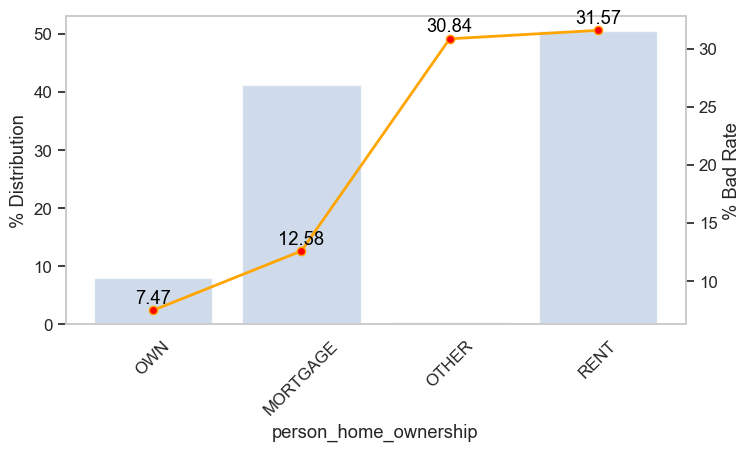

**********************************************************************


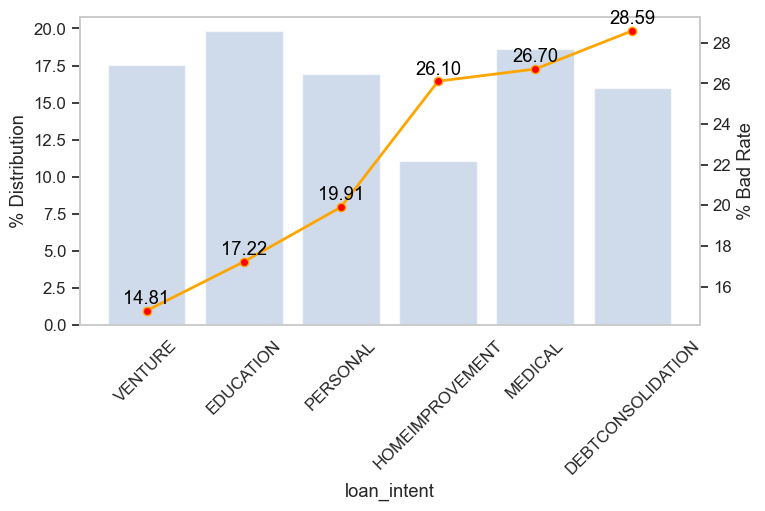

**********************************************************************


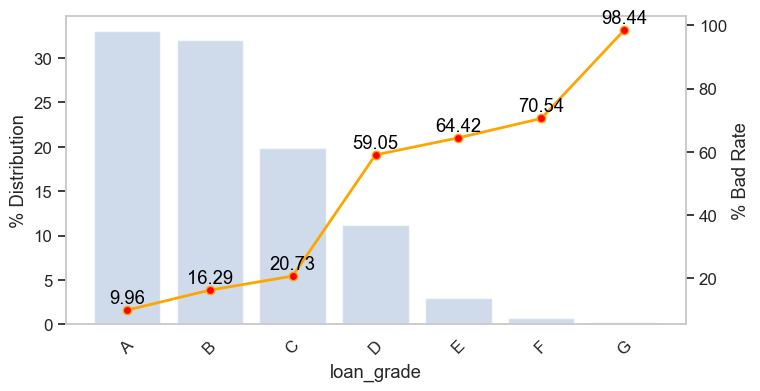

**********************************************************************


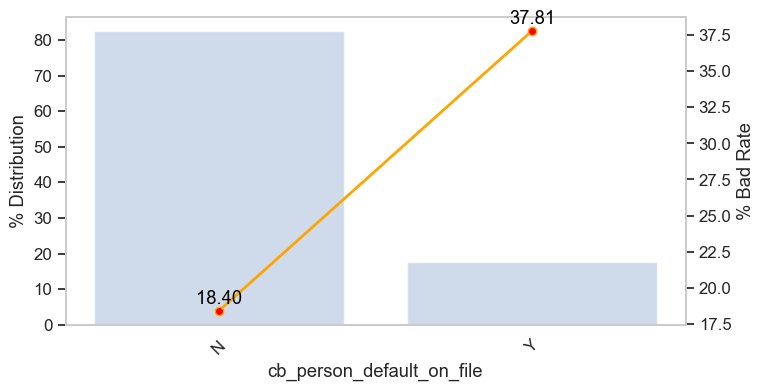

**********************************************************************


In [21]:
for col in df.loc[:, df.dtypes == object].columns: 
  df_cat = mean_target_per_category(df, col)
  print('*'*70)


In [22]:
df_cat

,cb_person_default_on_file,%Dist,loan_status
0,N,0.82367,0.183969
1,Y,0.17633,0.378068


## Feature engineering

In [23]:
df['dsr'] = df['loan_amnt']/df['person_income']


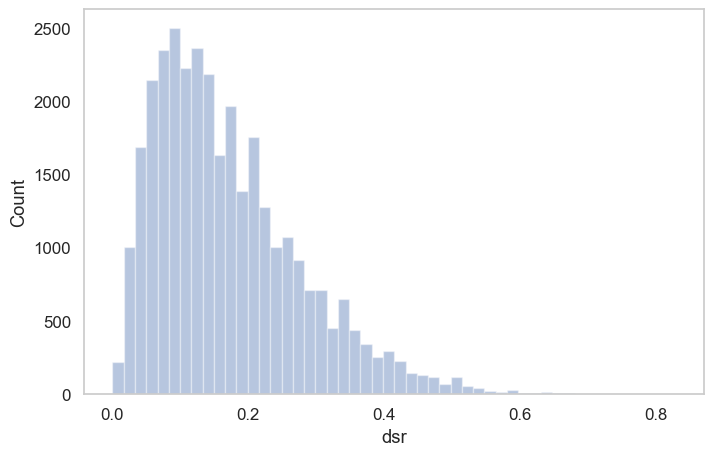

In [24]:
plt.subplots(figsize=(8,5))
sns.distplot(df['dsr'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

In [25]:
df.groupby('loan_intent').agg({'dsr': ['min', 'mean', 'median', 'max']})

dsr                              
                        min      mean    median       max
loan_intent                                              
DEBTCONSOLIDATION  0.004444  0.170800  0.147494  0.711538
EDUCATION          0.005464  0.170141  0.148221  0.771154
HOMEIMPROVEMENT    0.001282  0.165322  0.143223  0.700000
MEDICAL            0.005072  0.175195  0.151515  0.777083
PERSONAL           0.000789  0.169180  0.147692  0.830000
VENTURE            0.004143  0.170490  0.147368  0.714286

In [26]:
#check
df.loc[df['dsr']>0.8]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
customer_id,,,,,,,,,,,,
0ab3438d-8c0f-4fb2-a394-388e88a2835a,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,1,N,3,0.83


In [27]:
df_dsr = df[['loan_status', 'dsr']]
df_dsr['bin_dsr'] = pd.qcut(df_dsr['dsr'].astype(float), q=5, duplicates='drop', precision=0)
df_dsr = df_dsr.groupby('bin_dsr').agg({'loan_status': ['count', 'sum']})
df_dsr.columns = df_dsr.columns.map('_'.join)
df_dsr['dist'] = df_dsr['loan_status_count']/df_dsr['loan_status_count'].sum()
df_dsr['bad_rate'] = df_dsr['loan_status_sum']/df_dsr['loan_status_count']
df_dsr = df_dsr.reset_index()
df_dsr

,bin_dsr,loan_status_count,loan_status_sum,dist,bad_rate
0,"(-0.09920000000000001, 0.08]",6524,694,0.200239,0.106376
1,"(0.08, 0.1]",6510,818,0.199810,0.125653
2,"(0.1, 0.2]",6515,956,0.199963,0.146738
3,"(0.2, 0.3]",6517,1233,0.200025,0.189197
4,"(0.3, 0.8]",6515,3408,0.199963,0.523101


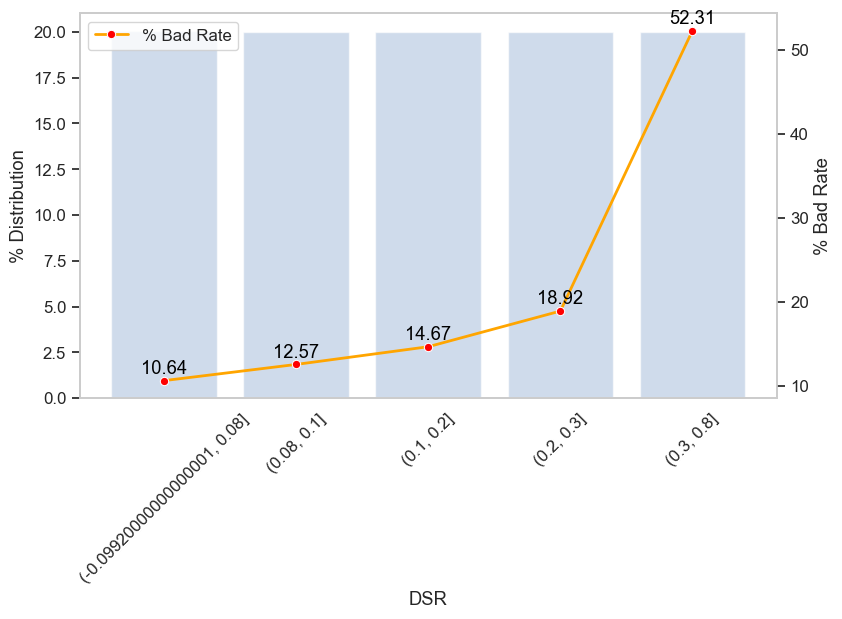

In [28]:
x1 = df_dsr['bin_dsr'].astype(str)
x2 = df_dsr.index
y1 = df_dsr['dist']*100 
y2 = df_dsr['bad_rate']*100

sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax1  = plt.subplots(figsize=(9,5))
plt.tick_params(axis='x', rotation = 45)

ax1.bar(x1,y1, data = df_dsr, color='lightsteelblue', alpha=.6)
ax1.xaxis.grid()

ax2 = ax1.twinx()
ax2 = sns.lineplot(x=x2, y=y2, marker='o',\
                markerfacecolor='red', markersize=6, color='orange', 
                linewidth=2, label='% Bad Rate')

ax1.set_xlabel('DSR')
ax1.set_ylabel('% Distribution')
ax2.set_ylabel('% Bad Rate')
ax1.grid(False)
ax2.grid(False)

for x,y in zip(x2,y2):
        label = "{:.2f}".format(y)
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 


plt.show();


## Weight of Evidence (WOE) & Information Value (IV)

In [29]:
def fill_missing(df):
    for col in df.columns:
        if pd.api.types.is_object_dtype(df[col]):
            df[col] = df[col].fillna(value='Unidentified')
            
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
            
    return df


In [30]:
df_clean = fill_missing(df)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  dsr                         32581 non-null  float64
dtypes: float64(3), int64(5), ob

In [31]:
def binning_numeric(df):
  
  for i in df._get_numeric_data().columns:
    if i == 'loan_status': 
      continue
    else:
      df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')

  return df_clean


In [32]:
df_bin = binning_numeric(df_clean)
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   person_age                  32581 non-null  object
 1   person_income               32581 non-null  object
 2   person_home_ownership       32581 non-null  object
 3   person_emp_length           32581 non-null  object
 4   loan_intent                 32581 non-null  object
 5   loan_grade                  32581 non-null  object
 6   loan_amnt                   32581 non-null  object
 7   loan_int_rate               32581 non-null  object
 8   loan_status                 32581 non-null  int64 
 9   cb_person_default_on_file   32581 non-null  object
 10  cb_person_cred_hist_length  32581 non-null  object
 11  dsr                         32581 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.2

In [33]:
df_woe = df_bin.copy()
df_woe.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
customer_id,,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,"(19.0, 23.0]","(49000.0, 63000.0]",RENT,"(8.0, 123.0]",PERSONAL,D,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(1.0, 3.0]","(0.3, 0.8]"
49d00b80-f7ec-41ec-8063-8cc32f384268,"(19.0, 23.0]","(3999.0, 35000.0]",OWN,"(3.0, 5.0]",EDUCATION,B,"(499.0, 4400.0]","(10.6, 11.5]",0,N,"(1.0, 3.0]","(0.08, 0.1]"
25172c7f-160a-44ac-b271-5833b7a679f6,"(23.0, 25.0]","(3999.0, 35000.0]",MORTGAGE,"(-1.0, 1.0]",MEDICAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
a8f721ac-9696-48b3-ae35-bc8b13592d26,"(19.0, 23.0]","(63000.0, 86000.0]",RENT,"(3.0, 5.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
53be6c0c-0a33-41c1-a8d0-e9784b077f98,"(23.0, 25.0]","(49000.0, 63000.0]",RENT,"(5.0, 8.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(3.0, 4.0]","(0.3, 0.8]"


In [34]:
def woe_iv(df_woe):

  iv_dict = {}
  final_iv = {}

  for i in df_woe.select_dtypes(object).columns:

    ### Calculate WOE and IV ###
    d = pd.DataFrame(df_woe.groupby([i]).size(), columns=['total'])

    d['count_bad'] = df_woe.groupby([i])['loan_status'].sum()
    d['count_good'] = d['total']-d['count_bad']

    d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
    d['dist_good'] = d['count_good']/d['count_good'].sum()
    
    d['woe'] = np.log(d.dist_bad/d.dist_good)
    d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good)

    d = d.replace([np.inf, -np.inf], 0)
    d = d.reset_index()
    
    ### Append dataframe in dictionary ###  
    if i not in final_iv: 
      final_iv[i] = []   
    final_iv[i].append(d)
    
    ### Map WOE value ###
    woe_dict = d.groupby([i])['woe'].mean().to_dict()
    df_woe['woe_'+i] = df_woe[i].map(woe_dict) 
    
    ### Calculate final IV of each feature and append in dictionary
    if i not in iv_dict: 
      iv_dict[i] = []    
    iv_dict[i].append(d['iv'].sum())
  
  ### Generate IV dataframe 
  iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
  iv_df.index.name = 'Feature' 

  return final_iv, iv_df, df_woe

In [35]:
final_iv, IV, df_woe = woe_iv(df_woe)

In [36]:
final_iv['person_income']

[          person_income  total  count_bad  count_good  dist_bad  dist_good  \
 0     (3999.0, 35000.0]   6630       2869        3761  0.403573   0.147652   
 1    (35000.0, 49000.0]   6546       1535        5011  0.215923   0.196726   
 2    (49000.0, 63000.0]   6397       1164        5233  0.163736   0.205441   
 3    (63000.0, 86000.0]   6515        948        5567  0.133352   0.218554   
 4  (86000.0, 6000000.0]   6493        593        5900  0.083415   0.231627   
 
         woe        iv  
 0  1.005497  0.257327  
 1  0.093113  0.001788  
 2 -0.226904  0.009463  
 3 -0.494039  0.042093  
 4 -1.021295  0.151368  ]

In [37]:
final_iv['person_age']

[      person_age  total  count_bad  count_good  dist_bad  dist_good       woe  \
 0   (19.0, 23.0]   8766       2092        6674  0.294275   0.262013  0.116119   
 1   (23.0, 25.0]   6586       1444        5142  0.203123   0.201869  0.006193   
 2   (25.0, 27.0]   4615        961        3654  0.135181   0.143452 -0.059385   
 3   (27.0, 32.0]   6963       1445        5518  0.203263   0.216630 -0.063688   
 4  (32.0, 144.0]   5651       1167        4484  0.164158   0.176036 -0.069861   
 
          iv  
 0  0.003746  
 1  0.000008  
 2  0.000491  
 3  0.000851  
 4  0.000830  ]

In [38]:
IV.sort_values(by='IV', ascending=False)

,IV
Feature,
loan_grade,0.881539
dsr,0.719621
loan_int_rate,0.590146
person_income,0.462039
person_home_ownership,0.376710
cb_person_default_on_file,0.163922
loan_intent,0.095705
loan_amnt,0.073652
person_emp_length,0.049930


In [39]:
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  object 
 1   person_income                   32581 non-null  object 
 2   person_home_ownership           32581 non-null  object 
 3   person_emp_length               32581 non-null  object 
 4   loan_intent                     32581 non-null  object 
 5   loan_grade                      32581 non-null  object 
 6   loan_amnt                       32581 non-null  object 
 7   loan_int_rate                   32581 non-null  object 
 8   loan_status                     32581 non-null  int64  
 9   cb_person_default_on_file       32581 non-null  object 
 10  cb_person_cred_hist_length      32581 non-null  object 
 11  dsr                             

In [40]:
# iv predictive power

#  < 0.02 = Useless prediction
# 0.02 - 0.1 = weak prediction
# 0.1 - 0.3 = medium prediction
# 0.3 - 0.5 = strong prediction
# > 0.5 = god prediction 

def iv_group(df):
  
    if df['IV'] > 0.5:
        val = 'Suspicious'
    elif df['IV'] > 0.3 and df['IV'] <= 0.5 :
        val = 'Strong'
    elif df['IV'] > 0.1 and df['IV'] <= 0.3 :
        val = 'Medium'
    elif df['IV'] > 0.02 and df['IV'] <= 0.1 :
        val = 'Weak'
    else:
        val = 'Not useful'

    return val

IV['Predictive_Power'] = IV.apply(iv_group, axis=1) # ad columns
IV.sort_values('IV',ascending=False)

,IV,Predictive_Power
Feature,,
loan_grade,0.881539,Suspicious
dsr,0.719621,Suspicious
loan_int_rate,0.590146,Suspicious
person_income,0.462039,Strong
person_home_ownership,0.376710,Strong
cb_person_default_on_file,0.163922,Medium
loan_intent,0.095705,Weak
loan_amnt,0.073652,Weak
person_emp_length,0.049930,Weak


##  Data partition

In [41]:
X = df_woe.loc[:, df_woe.columns.str.startswith('woe_')] 
y = df_woe['loan_status']

In [42]:
X.head(3)

,woe_person_age,woe_person_income,woe_person_home_ownership,woe_person_emp_length,woe_loan_intent,woe_loan_grade,woe_loan_amnt,woe_loan_int_rate,woe_cb_person_default_on_file,woe_cb_person_cred_hist_length,woe_dsr
customer_id,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,0.116119,-0.226904,0.502614,-0.323157,-0.115973,1.642076,0.472619,1.209506,0.778461,0.064186,1.368686
49d00b80-f7ec-41ec-8063-8cc32f384268,0.116119,1.005497,-1.240559,-0.022117,-0.294121,-0.360917,-0.051501,-0.215255,-0.213465,0.064186,-0.663736
25172c7f-160a-44ac-b271-5833b7a679f6,0.006193,1.005497,-0.662570,0.323545,0.266357,-0.064818,-0.288606,-0.117564,-0.213465,0.064186,1.368686


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y) 
                                                                    

### Variance Inflation Factor (VIF)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:

def vif_calculation(X):
  
  features = X.copy()
  features.columns = features.columns.str.replace('woe_', '')
  features = features.assign(const=1)

  vif = pd.DataFrame()
  vif["Feature"] = features.columns
  vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
  
  return vif


In [46]:
vif = vif_calculation(X)
vif

,Feature,VIF Factor
0,person_age,2.277841
1,person_income,1.570873
2,person_home_ownership,1.106796
3,person_emp_length,1.080712
4,loan_intent,1.017112
5,loan_grade,2.825568
6,loan_amnt,1.608685
7,loan_int_rate,2.841616
8,cb_person_default_on_file,1.329389
9,cb_person_cred_hist_length,2.231290


## Train logistic regression 

In [47]:
import statsmodels.api as sm

In [48]:
def train_model(X_train, y_train):  
    model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=True, 
                                                            maxiter=100,
                                                            intercept=True)
        
    
    results_as_html = model.summary().tables[1].as_html()
    summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
    summary['Feature'] = summary.index
    summary = summary.reset_index(drop=True)
    summary['Feature'] = summary['Feature'].str.replace('woe_', '')
    summary = summary.set_index(['Feature'], drop=True)

    return model, summary

In [49]:
lr, lr_summary = train_model(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.343446
         Iterations 7


In [50]:
lr_summary

,coef,std err,z,P>|z|,[0.025,0.975]
Feature,,,,,,
const,-1.3469,0.020,-67.028,0.000,-1.386,-1.307
person_age,0.4686,0.371,1.264,0.206,-0.258,1.195
person_income,0.9459,0.035,26.837,0.000,0.877,1.015
person_home_ownership,0.8825,0.032,27.192,0.000,0.819,0.946
person_emp_length,0.1514,0.089,1.700,0.089,-0.023,0.326
loan_intent,1.3542,0.063,21.508,0.000,1.231,1.478
loan_grade,1.1191,0.034,32.843,0.000,1.052,1.186
loan_amnt,0.7445,0.091,8.153,0.000,0.566,0.923
loan_int_rate,0.0744,0.041,1.809,0.070,-0.006,0.155


## Predict results

In [51]:
y_pred_train = lr.predict(sm.add_constant(X_train))
y_pred_test = lr.predict(sm.add_constant(X_test))

y_pred_test

customer_id
a7ffec61-d78c-4432-8a0c-3c45c15d52dd    0.138296
e4811ccc-a5d6-4736-89d9-8c44798637be    0.165213
353355c6-4fc3-4474-a53d-272968f0cb70    0.019102
0350a780-fe5b-451f-95e0-fb8819461c1a    0.056905
56bae8b4-16c7-4790-9f2a-6aec3e8604c0    0.003937
                                          ...   
bfc11849-7cb3-4fbd-a919-9270f2a1c725    0.003830
fa392284-258f-419f-bb25-5abe3b6f5ecc    0.010725
2ec5fb34-1178-4a50-a295-b32b561d74d3    0.022056
36589fd9-ae25-4485-bd3c-2e2ac47bf601    0.764325
7cb74578-1da4-49bb-b9a2-2cdb97e48f86    0.912509
Length: 6517, dtype: float64

## Model evaluation

In [52]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report , roc_auc_score

In [53]:
y_pred_test_class = (y_pred_test > 0.5).astype(int)

print(classification_report(y_test, y_pred_test_class))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      5095
           1       0.71      0.52      0.60      1422

    accuracy                           0.85      6517
   macro avg       0.79      0.73      0.75      6517
weighted avg       0.84      0.85      0.84      6517



In [54]:
def roc_gini(y, y_pred_proba):

  assert y.shape == y_pred_proba.shape 
  fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
  auc = metrics.roc_auc_score(y, y_pred_proba)
  gini = (2 * auc - 1)*100

  fig = plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, color='C0', label='%s AUC = %0.4f, Gini = %0.2f' % ('Model: ', auc,  gini), 
           linewidth=2.5)
  plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--', linewidth=2) 
  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right',fontsize='small')
  plt.grid(False)
  plt.show()

Training set


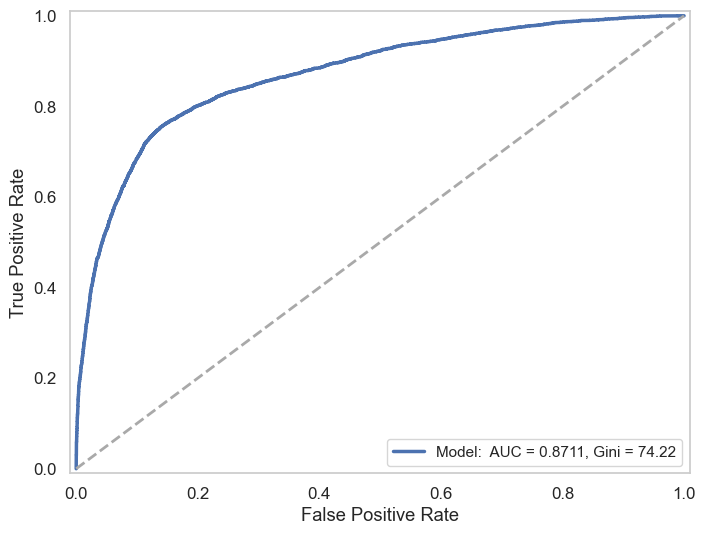

Test set


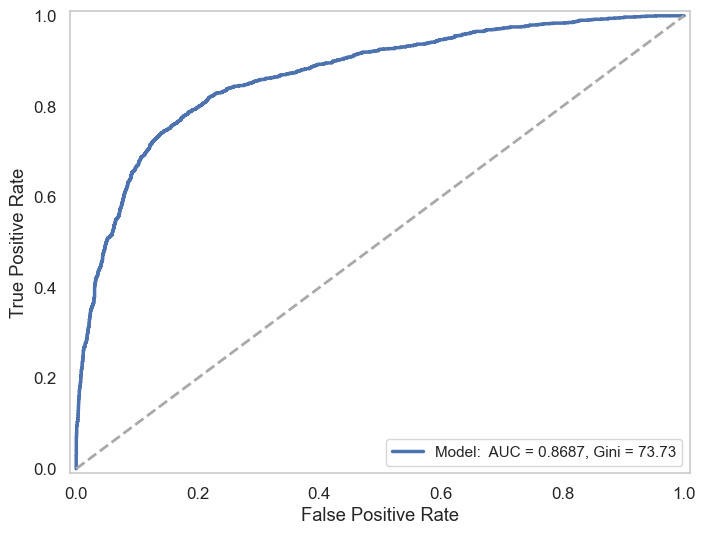

In [55]:
print('Training set')
roc_gini(y_train.values, y_pred_train)
    
print('Test set')
roc_gini(y_test.values, y_pred_test)

## Sumary model

In [56]:
def summary_model(IV, vif, summary): 
    
    summary_model = IV.merge(vif, left_on= 'Feature', right_on='Feature').merge(lr_summary ,on='Feature') 
    summary_model = summary_model.rename(columns={'P>|z|': "p-value", "VIF Factor": "vif", "IV":"iv"}) 
    ### calculate feature importance ### 
    summary_model['feature_importance'] = (summary_model['coef'].abs()/summary_model['coef'].abs().sum())*100
    
    return summary_model

In [57]:
summary = summary_model(IV, vif, lr_summary)
summary

,Feature,iv,Predictive_Power,vif,coef,std err,z,p-value,[0.025,0.975],feature_importance
0,person_age,0.005926,Not useful,2.277841,0.4686,0.371,1.264,0.206,-0.258,1.195,6.845573
1,person_income,0.462039,Strong,1.570873,0.9459,0.035,26.837,0.000,0.877,1.015,13.818240
2,person_home_ownership,0.376710,Strong,1.106796,0.8825,0.032,27.192,0.000,0.819,0.946,12.892057
3,person_emp_length,0.049930,Weak,1.080712,0.1514,0.089,1.700,0.089,-0.023,0.326,2.211737
4,loan_intent,0.095705,Weak,1.017112,1.3542,0.063,21.508,0.000,1.231,1.478,19.782917
5,loan_grade,0.881539,Suspicious,2.825568,1.1191,0.034,32.843,0.000,1.052,1.186,16.348443
6,loan_amnt,0.073652,Weak,1.608685,0.7445,0.091,8.153,0.000,0.566,0.923,10.876076
7,loan_int_rate,0.590146,Suspicious,2.841616,0.0744,0.041,1.809,0.070,-0.006,0.155,1.086877
8,cb_person_default_on_file,0.163922,Medium,1.329389,-0.0537,0.050,-1.065,0.287,-0.152,0.045,0.784480
9,cb_person_cred_hist_length,0.003596,Not useful,2.231290,0.2206,0.476,0.463,0.643,-0.713,1.154,3.222649


## Tune model

In [58]:
summary['Feature'].loc[summary['p-value']>0.05].to_list()

['person_age',
 'person_emp_length',
 'loan_int_rate',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [59]:
X_2 = X.drop(['woe_cb_person_cred_hist_length', 'woe_cb_person_default_on_file', 
              'woe_person_age', 'woe_person_emp_length', 'woe_loan_int_rate',
              'woe_loan_amnt'], axis=1)
y_2 = df_woe['loan_status']

In [60]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=99, stratify=y)

In [61]:
lr_2, lr_2_summary = train_model(X_train_2, y_train_2)

Optimization terminated successfully.
         Current function value: 0.344957
         Iterations 7


In [62]:
y_pred_train_2 = lr_2.predict(sm.add_constant(X_train_2))
y_pred_test_2 = lr_2.predict(sm.add_constant(X_test_2))

In [63]:
y_pred_test_class_2 = (y_pred_test_2 > 0.5).astype(int)

print(classification_report(y_test_2, y_pred_test_class_2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      5095
           1       0.71      0.51      0.59      1422

    accuracy                           0.85      6517
   macro avg       0.79      0.73      0.75      6517
weighted avg       0.84      0.85      0.84      6517



Training set


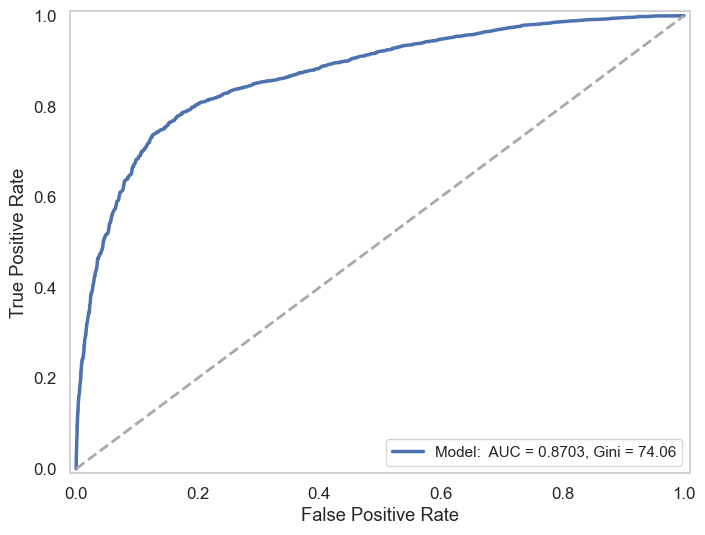

Test set


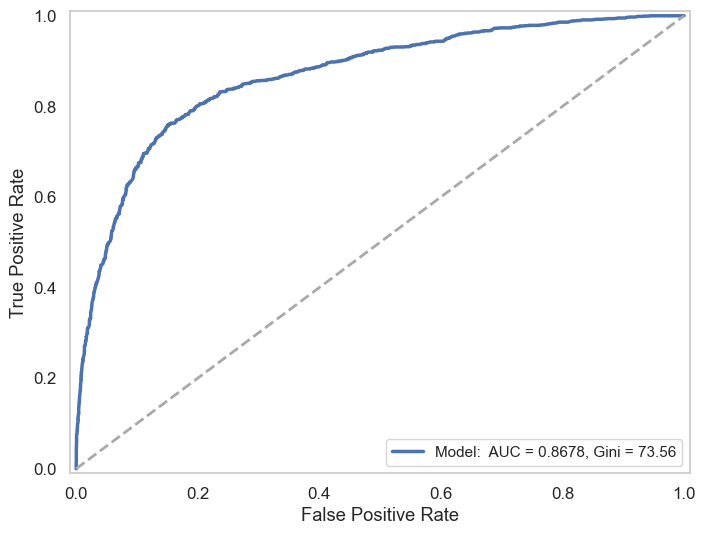

In [64]:
print('Training set')
roc_gini(y_train_2.values, y_pred_train_2)
    
print('Test set')
roc_gini(y_test_2.values, y_pred_test_2)

In [65]:
vif_2 = vif_calculation(X_2)
vif_2

,Feature,VIF Factor
0,person_income,1.170192
1,person_home_ownership,1.068363
2,loan_intent,1.003869
3,loan_grade,1.025455
4,dsr,1.133359
5,const,1.106320


In [66]:
summary_2 = summary_model(IV, vif_2, lr_2_summary)
summary_2.sort_values(by='feature_importance', ascending=False)

,Feature,iv,Predictive_Power,vif,coef,std err,z,p-value,[0.025,0.975],feature_importance
2,loan_intent,0.095705,Weak,1.003869,1.3542,0.063,21.508,0.0,1.231,1.478,26.386859
3,loan_grade,0.881539,Suspicious,1.025455,1.1191,0.034,32.843,0.0,1.052,1.186,21.805888
0,person_income,0.462039,Strong,1.170192,0.9459,0.035,26.837,0.0,0.877,1.015,18.431052
1,person_home_ownership,0.376710,Strong,1.068363,0.8825,0.032,27.192,0.0,0.819,0.946,17.195690
4,dsr,0.719621,Suspicious,1.133359,0.8304,0.026,31.819,0.0,0.779,0.882,16.180511


## Random forest

In [67]:
df1 = data.copy()
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
customer_id,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


In [68]:
df1['dsr'] = df1['loan_amnt']/df1['person_income']

In [69]:
df1 = df1[["person_income","person_home_ownership","loan_intent","loan_grade","dsr","loan_status"]]

In [70]:
df1.head()

,person_income,person_home_ownership,loan_intent,loan_grade,dsr,loan_status
customer_id,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,59000,RENT,PERSONAL,D,0.593220,1
49d00b80-f7ec-41ec-8063-8cc32f384268,9600,OWN,EDUCATION,B,0.104167,0
25172c7f-160a-44ac-b271-5833b7a679f6,9600,MORTGAGE,MEDICAL,C,0.572917,1
a8f721ac-9696-48b3-ae35-bc8b13592d26,65500,RENT,MEDICAL,C,0.534351,1
53be6c0c-0a33-41c1-a8d0-e9784b077f98,54400,RENT,MEDICAL,C,0.643382,1


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_income          32581 non-null  int64  
 1   person_home_ownership  32581 non-null  object 
 2   loan_intent            32581 non-null  object 
 3   loan_grade             32581 non-null  object 
 4   dsr                    32581 non-null  float64
 5   loan_status            32581 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB


loan_status
0    25472
1     7109
Name: count, dtype: int64
------------------------------------------------------------
loan_status
0    78.180535
1    21.819465
Name: count, dtype: float64
------------------------------------------------------------


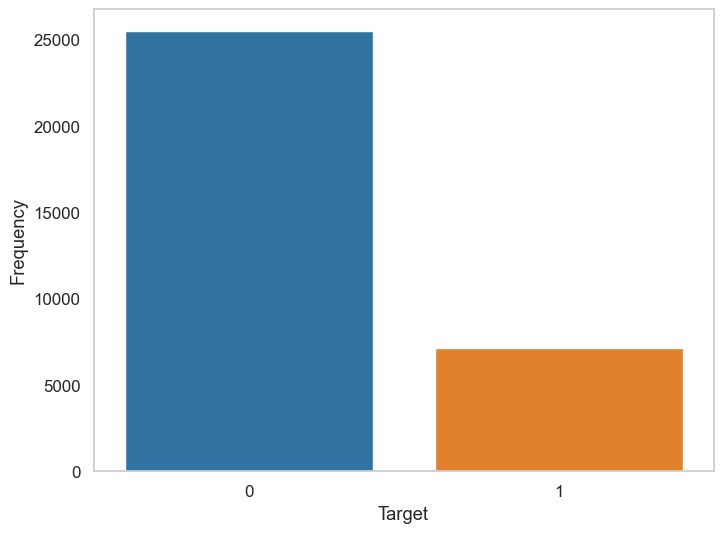

In [72]:

print(df1['loan_status'].value_counts())
print('-'*60)
print(df1['loan_status'].value_counts()/len(df1['loan_status'])*100)
print('-'*60)

fig = plt.figure(figsize=(8,6))
sns.countplot(x='loan_status',data=df1, palette='tab10')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(False)
plt.show();



In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_income          32581 non-null  int64  
 1   person_home_ownership  32581 non-null  object 
 2   loan_intent            32581 non-null  object 
 3   loan_grade             32581 non-null  object 
 4   dsr                    32581 non-null  float64
 5   loan_status            32581 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB


## Data partition

In [74]:
categorical_features = ["person_home_ownership", "loan_intent", "loan_grade"]
df_encoded = pd.get_dummies(df1, columns=categorical_features, drop_first=True)

In [75]:
X_3 = df_encoded.drop("loan_status", axis=1)  # Features
y_3 = df_encoded["loan_status"]  # Target (loan_status เป็น label ที่ต้องการทำนาย)

In [76]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

## Model Randomforest + Smote

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


In [78]:
smote = SMOTE(random_state=42)
X_train_3_resampled, y_train_3_resampled = smote.fit_resample(X_train_3, y_train_3)

In [79]:
print(y_train_3.value_counts())

loan_status
0    20401
1     5663
Name: count, dtype: int64


In [80]:
print(y_train_3_resampled.value_counts())

loan_status
0    20401
1    20401
Name: count, dtype: int64


In [81]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
        
}


In [82]:
rf_model = RandomForestClassifier(random_state=42)

In [83]:
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_dist,
                                   n_iter=100,  
                                   cv=5,       
                                   n_jobs=-1,   
                                   verbose=2,   
                                   random_state=42)

In [84]:
random_search.fit(X_train_3_resampled, y_train_3_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [85]:
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best score: 0.9117457461479874


In [86]:
best_model = random_search.best_estimator_

## Evaluate

In [87]:

y_pred_train_3 = best_model.predict(X_train_3)
y_pred_test_3  = best_model.predict(X_test_3)


In [88]:
print(classification_report(y_test_3, y_pred_test_3 )) 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5071
           1       0.76      0.77      0.76      1446

    accuracy                           0.89      6517
   macro avg       0.85      0.85      0.85      6517
weighted avg       0.90      0.89      0.89      6517



Training set


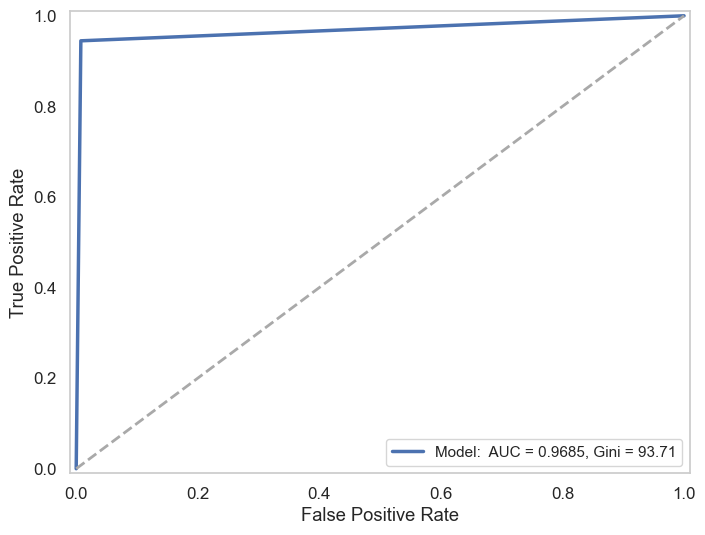

Test set


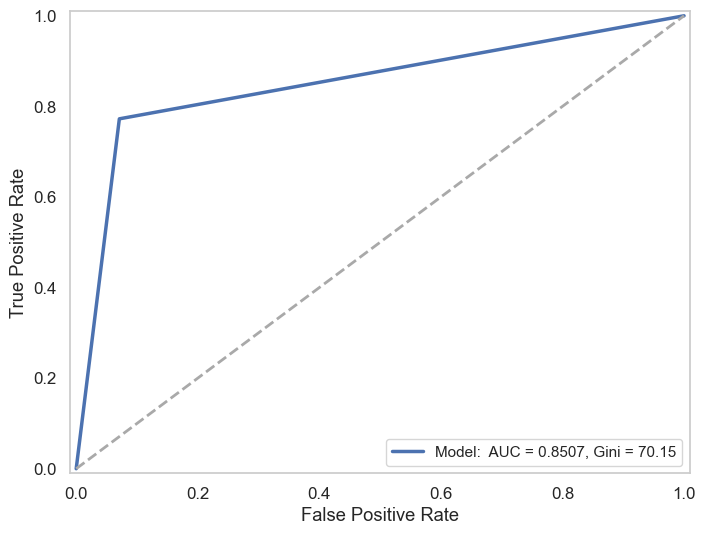

In [89]:
print('Training set')
roc_gini(y_train_3.values, y_pred_train_3)
    
print('Test set')
roc_gini(y_test_3.values, y_pred_test_3)

## Model LightGBM

In [90]:
df2 = data.copy()
df2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
customer_id,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


In [91]:
df2['dsr'] = df2['loan_amnt']/df2['person_income']

In [92]:
df2 = df2[["person_income","person_home_ownership","loan_intent","loan_grade","dsr","loan_status"]]

In [93]:
df2.head()

,person_income,person_home_ownership,loan_intent,loan_grade,dsr,loan_status
customer_id,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,59000,RENT,PERSONAL,D,0.593220,1
49d00b80-f7ec-41ec-8063-8cc32f384268,9600,OWN,EDUCATION,B,0.104167,0
25172c7f-160a-44ac-b271-5833b7a679f6,9600,MORTGAGE,MEDICAL,C,0.572917,1
a8f721ac-9696-48b3-ae35-bc8b13592d26,65500,RENT,MEDICAL,C,0.534351,1
53be6c0c-0a33-41c1-a8d0-e9784b077f98,54400,RENT,MEDICAL,C,0.643382,1


## Data partition

In [94]:
categorical_features1 = ["person_home_ownership", "loan_intent", "loan_grade"]
df_encoded1 = pd.get_dummies(df2, columns=categorical_features, drop_first=True)

In [95]:
X_4 = df_encoded.drop("loan_status", axis=1)  # Features
y_4 = df_encoded["loan_status"]  # Target 

In [96]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

In [97]:
smote = SMOTE(random_state=42)
X_train_4_resampled, y_train_4_resampled = smote.fit_resample(X_train_4, y_train_4)

In [98]:
print(y_train_4.value_counts())

loan_status
0    20401
1     5663
Name: count, dtype: int64


In [99]:
print(y_train_4_resampled.value_counts())

loan_status
0    20401
1    20401
Name: count, dtype: int64


## Lightgbm  Model

In [100]:
import lightgbm as lgb

In [101]:
param_dist1 = {
    'num_leaves': [31, 50, 100],  
    'max_depth': [-1, 10, 20, 30 ,40],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'n_estimators': [100, 200 , 300 , 400],                                              
    'min_child_samples': [20, 50, 100],  
}

In [102]:
model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

In [103]:
random_search1 = RandomizedSearchCV(
    model_lgb, param_distributions=param_dist1, n_iter=100,  
    scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1
)

In [104]:
random_search1.fit(X_train_4_resampled, y_train_4_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 20401, number of negative: 20401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 40802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(objective='binary',
                                            random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [-1, 10, 20, 30, 40],
                                        'min_child_samples': [20, 50, 100],
                                        'n_estimators': [100, 200, 300, 400],
                                        'num_leaves': [31, 50, 100]},
                   random_state=42, scoring='accuracy', verbose=1)

In [105]:
print("Best parameters:", random_search1.best_params_)
print("Best score:", random_search1.best_score_)

Best parameters: {'num_leaves': 100, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': 20, 'learning_rate': 0.1}
Best score: 0.9217698054592504


In [106]:
best_model1 = random_search1.best_estimator_

# Evaluate

In [107]:

y_pred_train_4 = best_model1.predict(X_train_4)
y_pred_test_4  = best_model1.predict(X_test_4)

In [108]:
print(classification_report(y_test_4, y_pred_test_4)) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5071
           1       0.79      0.79      0.79      1446

    accuracy                           0.91      6517
   macro avg       0.87      0.86      0.86      6517
weighted avg       0.91      0.91      0.91      6517



Training set


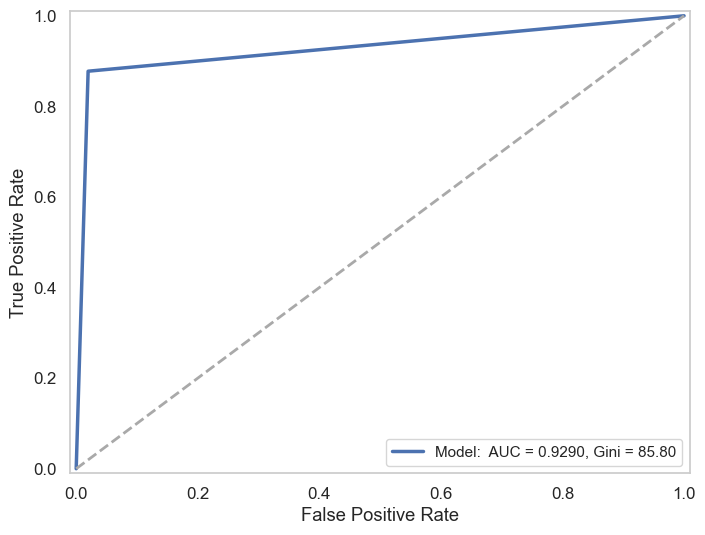

Test set


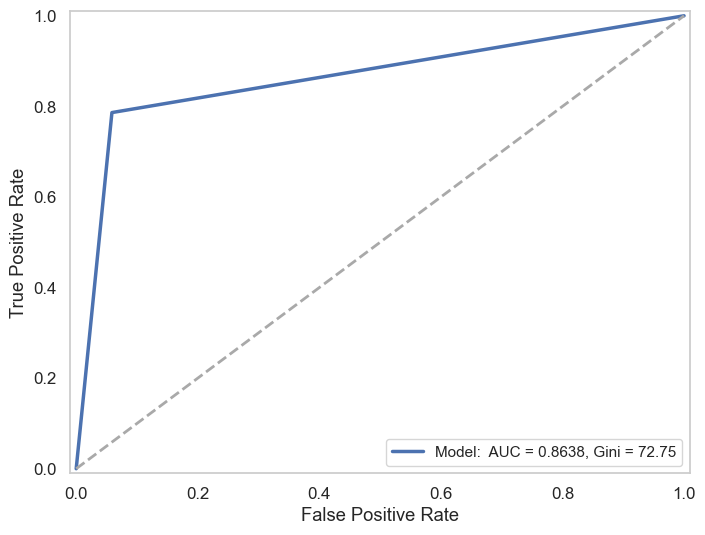

In [109]:
print('Training set')
roc_gini(y_train_4.values, y_pred_train_4)
    
print('Test set')
roc_gini(y_test_4.values, y_pred_test_4)

## Summary

In [110]:
# Logistic Regression
report = classification_report(y_test_2, y_pred_test_class_2, output_dict=True)
reportdf = pd.DataFrame(report).T

auc = roc_auc_score(y_test_2, y_pred_test_2)
gini = 2 * auc - 1

print("AUC: {:.2f}".format(auc)) 
print("gini: {:.2f}".format(gini))
reportdf

AUC: 0.87
gini: 0.74


,precision,recall,f1-score,support
0,0.872684,0.943081,0.906518,5095.000000
1,0.713155,0.507032,0.592684,1422.000000
accuracy,0.847936,0.847936,0.847936,0.847936
macro avg,0.792920,0.725057,0.749601,6517.000000
weighted avg,0.837875,0.847936,0.838040,6517.000000


In [111]:
# Randomforest
report1 = classification_report(y_test_3, y_pred_test_3, output_dict=True)
reportdf1 = pd.DataFrame(report1).T

auc1 = roc_auc_score(y_test_3, y_pred_test_3)
gini1 = 2 * auc1 - 1

print("AUC: {:.2f}".format(auc1)) 
print("gini: {:.2f}".format(gini1)) 

reportdf1 

AUC: 0.85
gini: 0.70


,precision,recall,f1-score,support
0,0.934722,0.929008,0.931856,5071.000000
1,0.756263,0.772476,0.764283,1446.000000
accuracy,0.894277,0.894277,0.894277,0.894277
macro avg,0.845492,0.850742,0.848070,6517.000000
weighted avg,0.895125,0.894277,0.894675,6517.000000


In [112]:
# LightGBM
report2 = classification_report(y_test_4, y_pred_test_4, output_dict=True)
reportdf2 = pd.DataFrame(report2).T

auc2= roc_auc_score(y_test_4, y_pred_test_4)
gini2 = 2 * auc2 - 1

print("AUC: {:.2f}".format(auc2)) 
print("gini: {:.2f}".format(gini2)) 


reportdf2

AUC: 0.86
gini: 0.73


,precision,recall,f1-score,support
0,0.939197,0.941234,0.940215,5071.000000
1,0.792334,0.786307,0.789309,1446.000000
accuracy,0.906859,0.906859,0.906859,0.906859
macro avg,0.865766,0.863771,0.864762,6517.000000
weighted avg,0.906611,0.906859,0.906732,6517.000000
